# Data analysis of a Titanic dataset with pandas

Each task costs 2 points. 20 points max in total.

Recommended material, besides lectures - [10 min introduction to pandas](https://pandas.pydata.org/docs/user_guide/10min.html).

#### Load Titanic dataset (attached file)

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

In [151]:
import pandas as pd

df = pd.read_excel('Data/titanic.xls')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# Please, answer the following questions with code and output or visualizations below each question.

### What  is  the  general proportion  of  survived  passengers?

In [248]:
print(f"proportion of survived passengers = {round(df.survived.sum() / df.shape[0], 3)}")

proportion of survived passengers = 0.382


### What  is  the  passenger  sex  distribution? 

<Axes: xlabel='sex', ylabel='count'>

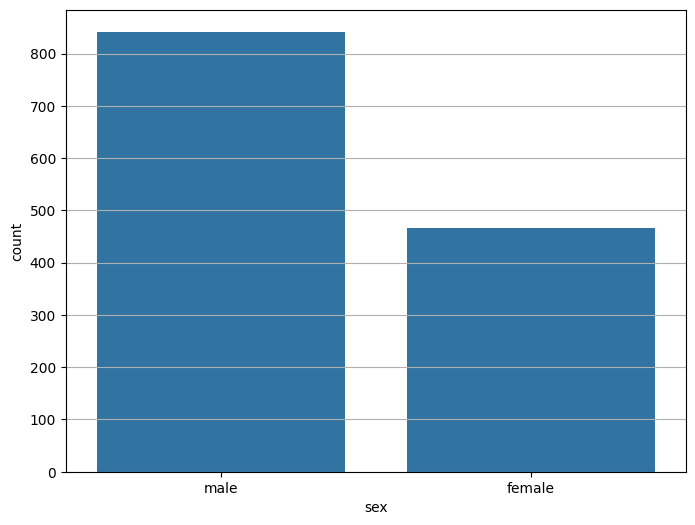

In [240]:
plt.figure(figsize=(8, 6))
plt.grid()

sns.barplot(df.sex.value_counts())

### What  is  the  passenger  service  class  distribution? 

<Axes: xlabel='pclass', ylabel='count'>

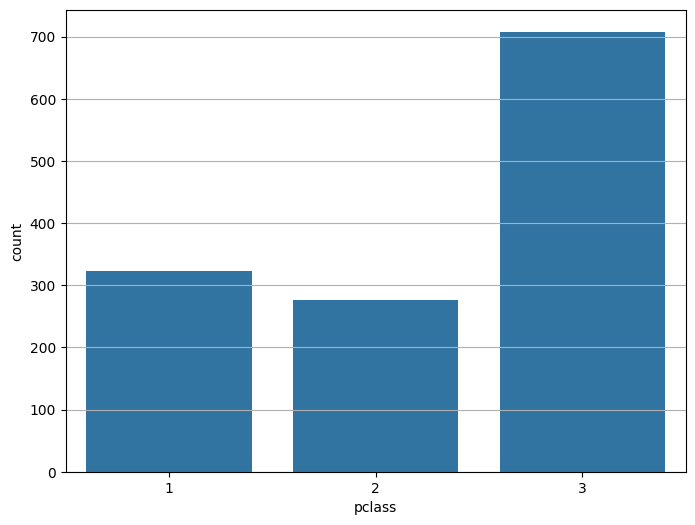

In [245]:
plt.figure(figsize=(8, 6))
plt.grid()

sns.barplot(df.pclass.value_counts())

### What  is  the  mean  of  the  fare?  What is its standard deviation? 

In [208]:
print(f"Mean fare: {df.fare.mean()}")
print(f"Std fare: {df.fare.std()}")


Mean fare: 33.29547928134557
Std fare: 51.75866823917411


### Plot on one graph, how  does  the  mean  male  age and female age  change  in  dependence  on  the service  class.

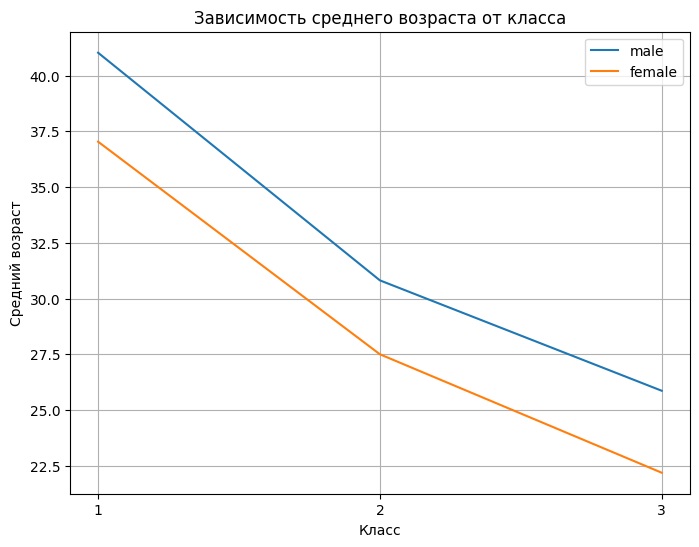

In [207]:
df_grby_male = df.loc[df.sex == "male", ["pclass", "age"]].groupby(["pclass"]).mean()[["age"]]
df_grby_female = df.loc[df.sex == "female", ["pclass", "age"]].groupby(["pclass"]).mean()[["age"]]

plt.figure(figsize=(8, 6))
plt.title('Зависимость среднего возраста от класса')
plt.xlabel('Класс')
plt.xticks([1,2,3])
plt.ylabel('Средний возраст')
plt.grid()

plt.plot(df_grby_male.index, df_grby_male.age, label="male")
plt.plot(df_grby_female.index, df_grby_female.age, label="female")
plt.legend()


### Display a pivot table of survival rates with hierarchical index [service class, sex] and column [Port of Embarkation] 

In [158]:
df.pivot_table(values="survived", index=["pclass", "sex"], columns=["embarked"], aggfunc="sum")

embarked        C   Q   S
pclass sex               
1      female  69   2  66
       male    28   0  33
2      female  11   2  81
       male     5   0  20
3      female  22  33  51
       male    15   7  53

### Is  it  true,  that  women  survived  more  frequently? 
Prove statistical significance by looking at standard deviation and [exact binomial test p-value](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.binom_test.html)

In [182]:
from scipy.stats import binomtest

In [198]:
ratio_male = df[df.sex == 'male']['survived'].mean()
k = df[df.sex == 'female']['survived'].sum()
n = df[df.sex == 'female'].shape[0]

p_value = binomtest(k, n, p=ratio_male).pvalue
print(f"p_value = {p_value}")

if p_value < 0.01:
    print("p_value меньше порога, отклоняем нулевую гипотезу о равенстве вероятности выживания")
else:
    print("p_value большле порога, не отвергаем нулевую гипотезу о равенстве вероятности выживания")

p_value = 8.57399268024488e-139
p_value меньше порога, отклоняем нулевую гипотезу о равенстве вероятности выживания


### Is  it  true,  that  younger  passengers  survived  more  frequently  than  older passengers?
To answer this question you need to plot survival rate with respect to passenger age. Graph should be smooth to be interpretable.

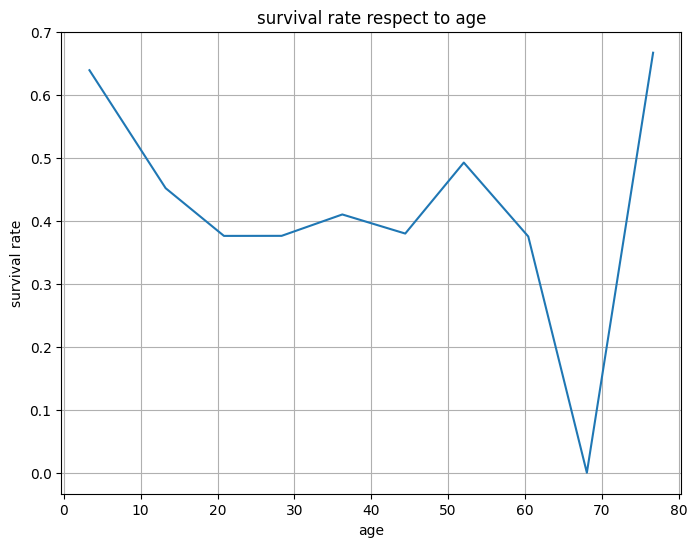

In [233]:
age = pd.cut(df['age'], bins=10)
result = df.groupby(age, observed=True)[['survived', 'age']].mean()

plt.figure(figsize=(8, 6))
plt.plot(result.age, result.survived)
plt.title('survival rate respect to age')
plt.xlabel('age')
plt.ylabel('survival rate')
plt.grid()
plt.show()

По графику можно судить, что дети и очень старые пассажиры, имели больший шанс на выживание

### Is  it  true,  that  passengers  with  more  expensive  tickets  survived  more frequently?
To answer this question you need to plot survival rate with respect to fare. Graph should be smooth to be interpretable.

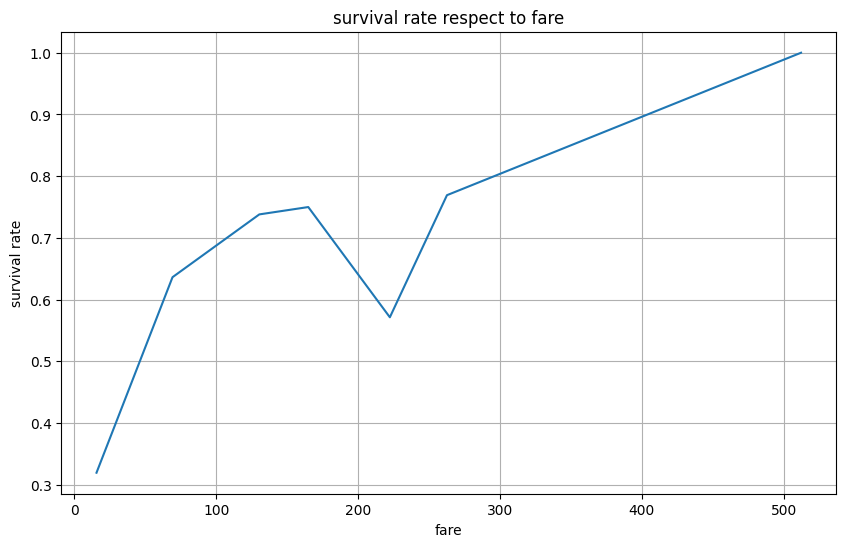

In [234]:
fare = pd.cut(df['fare'], bins=10)
res = df.groupby(fare, observed=True)[['survived', 'fare']].mean()

plt.figure(figsize=(10, 6))
plt.plot(res.fare, res.survived)
plt.title('survival rate respect to fare')
plt.xlabel('fare')
plt.ylabel('survival rate')
plt.grid()


plt.show()

По графику можно судить, что пассажиры с более дорогими билетами, имели больший шанс на выживание

### What  is  most  popular  male  name  on  the  ship? 
Don't account for surnames, titles, etc.

In [94]:
import string
from collections import Counter

punct = set(string.punctuation)
# take males, clean from punct split to list
res = df[df.sex == "male"].name.apply(lambda x: ''.join(char for char in x if char not in punct).split(" "))
# make one list 
cnt = Counter([y for x in res for y in x])
result = dict(cnt)
# sort dict descending
dict(sorted(result.items(), key=lambda item: item[1], reverse=True))

{'Mr': 763,
 'William': 68,
 'Master': 61,
 'John': 57,
 'Henry': 39,
 'Charles': 33,
 'George': 31,
 'James': 30,
 'Thomas': 29,
 'Joseph': 23,
 'Edward': 21,
 'Johan': 19,
 'Alfred': 16,
 'Richard': 15,
 'Arthur': 15,
 'Samuel': 15,
 'Frederick': 15,
 'Robert': 14,
 'Karl': 13,
 'Alexander': 12,
 'Patrick': 12,
 'Harry': 11,
 'Jr': 11,
 'Albert': 10,
 'Frank': 10,
 'Ernest': 9,
 'Peter': 9,
 'J': 9,
 'Martin': 9,
 'Leonard': 8,
 'Francis': 8,
 'Rev': 8,
 'August': 8,
 'H': 7,
 'Dr': 7,
 'Daniel': 7,
 'Victor': 7,
 'David': 7,
 'Elias': 7,
 'Walter': 6,
 'Williams': 6,
 'Gustaf': 6,
 'Davies': 6,
 'Ernst': 6,
 'Nils': 6,
 'Asplund': 6,
 'Ivan': 6,
 'Olsen': 6,
 'Sage': 6,
 'Bertram': 5,
 'Emil': 5,
 'de': 5,
 'Abraham': 5,
 'Philip': 5,
 'Andrew': 5,
 'Michael': 5,
 'Edvard': 5,
 'Edvin': 5,
 'Carl': 5,
 'Gustafsson': 5,
 'Hanna': 5,
 'Goodwin': 5,
 'Hansen': 5,
 'Johansson': 5,
 'Panula': 5,
 'Rice': 5,
 'Col': 4,
 'Jakob': 4,
 'Olof': 4,
 'Herbert': 4,
 'Douglas': 4,
 'Benjamin': 4,

Самое популярное имя William